In [2]:
import pandas as pd

file_path = "Ïä§ÌÇ®_ÌÜ†ÎÑà_reviews.csv"
df = pd.read_csv(file_path, encoding='utf-8-sig')

In [3]:
# Step 1: Í∏∞Îä•Î≥Ñ ÌÇ§ÏõåÎìú Ï†ïÏùò (ÏÜçÏÑ± ÏÇ¨Ï†Ñ)
aspect_keywords = {
    'ÎØ∏Î∞±': ['ÎØ∏Î∞±', 'ÌÜ§ÏóÖ', 'ÌïòÏñòÏßê', 'ÌôîÏù¥Ìä∏Îãù'],
    'Î≥¥Ïäµ': ['Î≥¥Ïäµ', 'Ï¥âÏ¥â', 'ÏàòÎ∂Ñ', 'Í±¥Ï°∞ÌïòÏßÄ', 'ÏÜçÎãπÍπÄ', 'ÏàòÎ∂ÑÍ∞ê'],
    'Ìä∏Îü¨Î∏î': ['Ìä∏Îü¨Î∏î', 'Ïó¨ÎìúÎ¶Ñ', 'ÏûêÍ∑π', 'ÏßÑÏ†ï', 'Î∂âÏñ¥Ïßê', 'Îæ∞Î£®ÏßÄ', 'ÎØºÍ∞ê'],
    'Î≥¥Ìò∏': ['ÏûêÏô∏ÏÑ†', 'Ï∞®Îã®', 'Î≥¥Ìò∏Îßâ', 'Î∞©Ïñ¥', 'Î®ºÏßÄÏ∞®Îã®', 'ÌîºÎ∂ÄÎ≥¥Ìò∏'],
    'ÎÖ∏ÌôîÎ∞©ÏßÄ': ['Ï£ºÎ¶Ñ', 'ÌÉÑÎ†•', 'ÎÖ∏Ìôî', 'ÏïàÌã∞ÏóêÏù¥Ïßï', 'Ï≤òÏßê', 'Î¶¨ÌîÑÌåÖ']
}

# ÌôïÏù∏Ïö© Ï∂úÎ†•
aspect_keywords

{'ÎØ∏Î∞±': ['ÎØ∏Î∞±', 'ÌÜ§ÏóÖ', 'ÌïòÏñòÏßê', 'ÌôîÏù¥Ìä∏Îãù'],
 'Î≥¥Ïäµ': ['Î≥¥Ïäµ', 'Ï¥âÏ¥â', 'ÏàòÎ∂Ñ', 'Í±¥Ï°∞ÌïòÏßÄ', 'ÏÜçÎãπÍπÄ', 'ÏàòÎ∂ÑÍ∞ê'],
 'Ìä∏Îü¨Î∏î': ['Ìä∏Îü¨Î∏î', 'Ïó¨ÎìúÎ¶Ñ', 'ÏûêÍ∑π', 'ÏßÑÏ†ï', 'Î∂âÏñ¥Ïßê', 'Îæ∞Î£®ÏßÄ', 'ÎØºÍ∞ê'],
 'Î≥¥Ìò∏': ['ÏûêÏô∏ÏÑ†', 'Ï∞®Îã®', 'Î≥¥Ìò∏Îßâ', 'Î∞©Ïñ¥', 'Î®ºÏßÄÏ∞®Îã®', 'ÌîºÎ∂ÄÎ≥¥Ìò∏'],
 'ÎÖ∏ÌôîÎ∞©ÏßÄ': ['Ï£ºÎ¶Ñ', 'ÌÉÑÎ†•', 'ÎÖ∏Ìôî', 'ÏïàÌã∞ÏóêÏù¥Ïßï', 'Ï≤òÏßê', 'Î¶¨ÌîÑÌåÖ']}

In [4]:
# 2) Í∞êÏÑ± ÌÇ§ÏõåÎìú Ï†ïÏùò
positive_words = ['Ï¢ãÎã§', 'Ï¢ãÏïÑÏöî', 'Ï¥âÏ¥âÌïòÎã§', 'ÎßåÏ°±', 'Í∞úÏÑ†', 'ÏßÑÏ†ïÎêêÎã§', 'Í¥úÏ∞ÆÎã§', 'Ìù°Ïàò']
negative_words = ['Î≥ÑÎ°ú', 'ÏûêÍ∑πÏ†Å', 'Ìä∏Îü¨Î∏îÎÇ¨Îã§', 'Í±¥Ï°∞ÌïòÎã§', 'Îî∞Í∞ëÎã§', 'Ìö®Í≥ºÏóÜÎã§', 'Î∂àÌé∏ÌïòÎã§', 'Îí§ÏßëÏñ¥Ïßê']

In [5]:
def label_review(text):
    labels = {'ÎØ∏Î∞±': None, 'Î≥¥Ïäµ': None, 'Ìä∏Îü¨Î∏î': None,'Î≥¥Ìò∏': None, 'ÎÖ∏ÌôîÎ∞©ÏßÄ': None}
    for aspect, keywords in aspect_keywords.items():
        if any(keyword in str(text) for keyword in keywords):
            if any(pword in str(text) for pword in positive_words):
                labels[aspect] = 'Í∏çÏ†ï'
            elif any(nword in str(text) for nword in negative_words):
                labels[aspect] = 'Î∂ÄÏ†ï'
            else:
                labels[aspect] = 'Ï§ëÎ¶Ω'
    return labels
    
# ÎùºÎ≤®ÎßÅ Ï†ÅÏö©
df['ÎùºÎ≤®'] = df['Î¶¨Î∑∞ÎÇ¥Ïö©'].apply(label_review)
print(df[['Î¶¨Î∑∞ÎÇ¥Ïö©', 'ÎùºÎ≤®']].head(10))

                                                Î¶¨Î∑∞ÎÇ¥Ïö©  \
0  Îã§Ïù¥ÏÜå ÏïàÍ∞úÎ∂ÑÏÇ¨ Ïä§ÌîÑÎ†àÏù¥ÏïàÏóê ÎÇ¥Ïö©Î¨ºÏùÑ Îã¥ÏïÑÏÑú ÎøåÎ†§ÏÑú Ïì∞ÎäîÍ≤å ÌôîÏû•ÏÜúÏóê Ï†ÅÏÖîÏÑú Îã¶ÎäîÍ±∞Î≥¥...   
1                  Ï¢ãÏïÑÏöî! ÏàúÌïòÍ≥† Ï¥âÏ¥âÌïòÍ≥† ÌÜ†ÎÑàÎäî Îäò Ïù¥Í±∞Îßå Ïì∞Í≥† ÏûàÏñ¥Ïöî „Öé„Öé   
2  ÏùºÎã® ÏßÄÏÑ±ÌïúÌÖå ÎêòÍ≤å Ïûò ÎßûÎäî Í≤É Í∞ôÏïÑÏöî ÏßÑÏßú ÎÅàÏ†ÅÏûÑ ÏïÑÏòà ÏóÜÍ≥† ÏàòÎ∂ÑÍ∞êÎßå ÎÇ≠ÎÇ≠Ìïú ÎäêÎÇå...   
3  Ïù¥Í≤å ÏÜçÏàòÎ∂Ñ Ïû°ÏïÑÏ£ºÎäîÎç∞ ÎêòÍ≤å Ï¢ãÏùÄ ÌÜ†ÎÑàÎùºÍ∏∏Îûò ÏÉÄÏóàÎäîÎç∞ 1Í∞úÎßå ÏÉÄÎäîÎç∞ÎèÑ Ïö©ÎüâÏù¥ ÏóÑÏ≤≠ÎÇò...   
4                 Í¥úÏ∞¨„ÑπÍ≤å Ïûò Ïì∞Í≥† ÏûàÏäµÎãàÎã§\nÌñ•Ïù¥ Ï¢Ä ÏûàÏñ¥Ïöî ÎÇòÏÅòÏßÑÏïäÏïÑÏöî „Öé„Öé   
5  Ïù¥Í≤å Ï†ïÎßê ÏÜçÍ±¥Ï°∞Ïóê Ï¢ãÎã§Í∏∏Îûò Ìïú Î≤à ÏÇ¨Î¥§Ïñ¥Ïöî Ï†Ñ Í±¥ÏÑ±Ïóê Í∞ÄÍπåÏö¥ Î≥µÌï©ÏÑ±Ïù¥Îùº Ìï≠ÏÉÅ ÏóêÏÑº...   
6  ÌÜ†ÎÑàÎ°ú ÏÇ¨Ïö©ÌñàÍ≥† Ìñ•ÏùÄ ÎØ∏ÎØ∏ÌïòÍ≤å ÏûàÏñ¥Ïöî.\nÎ¨ºÎ≥¥Îã§ ÏïΩÍ∞Ñ Ï†êÎèÑ ÎÜíÏùÄ Ï†úÌòïÏûÖÎãàÎã§.\nÏàòÎ∂Ñ...   
7           Îã¶ÌÜ†ÌïòÍ≥† Ìå©ÏúºÎ°úÎèÑ Ïûò ÏÇ¨Ïö© Ï§ëÏù∏ ÌÜ†ÎÑàÏóêÏó¨..! Ïó¨Îü¨ ÌÜµ Ïß∏ ÏÇ¨Ïö© Ï§ëÏù¥ÏóêÏ

In [6]:
file_paths = {
    "ÏïÑÏù¥ÌÅ¨Î¶º": "ÏïÑÏù¥ÌÅ¨Î¶º_reviews.csv",
    "ÏóêÏÑºÏä§_ÏÑ∏Îüº_Ïï∞Ìîå": "ÏóêÏÑºÏä§_ÏÑ∏Îüº_Ïï∞Ìîå_reviews.csv",
    "ÌÅ¨Î¶º": "ÌÅ¨Î¶º_reviews.csv"
}

# ÎèôÏùºÌïú ÎùºÎ≤®ÎßÅ Ìï®Ïàò ÏÇ¨Ïö©
def label_dataframe(file_path):
  if file_path.lower().endswith('.csv'):
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        df['ÎùºÎ≤®'] = df['Î¶¨Î∑∞ÎÇ¥Ïö©'].apply(label_review)
        return df

# Í∞Å ÌååÏùºÏóê ÎåÄÌï¥ ÎùºÎ≤®ÎßÅ ÏßÑÌñâ
labeled_dfs = {}
for name, path in file_paths.items():
    labeled_dfs[name] = label_dataframe(path)

In [7]:
#ÎùºÎ≤®ÎßÅ ÌôïÏù∏  
import pandas as pd

for name, df in labeled_dfs.items():
    print(f"‚Äî {name} ‚Äî")
    # 1) Ï†ÑÏ≤¥ Ìñâ¬∑Ïó¥ Í∞úÏàò
    print("Shape:", df.shape)
    # 2) ‚ÄòÎ¶¨Î∑∞ÎÇ¥Ïö©‚Äô ÎåÄÎπÑ ‚ÄòÎùºÎ≤®‚Äô ÏÉòÌîå 3Í∞ú
    print(df[['Î¶¨Î∑∞ÎÇ¥Ïö©','ÎùºÎ≤®']].head(3).to_dict(orient='records'))
    
    # 3) ÏÜçÏÑ±Î≥Ñ None(ÎØ∏Í≤ÄÏ∂ú) Í∞úÏàò ÌôïÏù∏
    labels_df = df['ÎùºÎ≤®'].apply(pd.Series)
    print("Í≤∞Ï∏°(ÎØ∏ÎùºÎ≤®) Í∞úÏàò:")
    print(labels_df.isnull().sum())
    
    print()  # Îπà Ï§Ñ


‚Äî ÏïÑÏù¥ÌÅ¨Î¶º ‚Äî
Shape: (32106, 4)
[{'Î¶¨Î∑∞ÎÇ¥Ïö©': 'ÎßéÏù¥ Î∞úÎùºÎèÑ ÎπÑÎ¶ΩÏ¢Ö Ïïà Ïò¨ÎùºÏò§Îäî ÏïÑÏù¥ÌÅ¨Î¶º!\nÏõÉÏùÑ Îïå ÎààÏ£ºÎ¶Ñ ÏÉùÍ∏∞Í∏∞ ÏãúÏûëÌïú Í±∞ ÏïåÏïÑÏ±ÑÍ≥† Î∞îÎ•¥Í∏∞ ÏãúÏûëÌï¥ÏÑú Î≤åÏç® 3ÌÜµÏß∏Ïù∏Îç∞ Ï£ºÎ¶ÑÍ∞úÏÑ† Ìö®Í≥ºÎèÑ ÌôïÏã§! ÌôîÏû•ÌïòÍ≥† ÏõÉÏùÑ Îïå ÎààÎÅºÏûÑÏù¥ ÎçúÌï¥Ïöî. Ïù¥ÎØ∏ Ïú†Î™ÖÌïú Ï†úÌíàÏù∏Îç∞ÏóêÎäî Ïù¥Ïú†Í∞Ä ÏûàÎäî ÎìØÌï¥Ïöî. Í∑∏Î¶¨Í≥† ÏïÑÏù¥ÌÅ¨Î¶ºÏù¥Îûë ÎÇòÏù¥Ìä∏ÌÅ¨Î¶º Í∞ôÏù¥ ÏÇ¨Ïö©Ìï¥Ï£ºÎ©¥ Îã§ÏùåÎÇ† ÏßÑÏßú ÏñºÍµ¥Ïù¥ ÌåΩÌåΩÌï¥Ï†∏ÏûàÏñ¥Ïöîb ÏïÑÏπ®ÏóêÎäî ÏñºÍµ¥Ïù¥ Î∂ÄÏñ¥ÏÑú Îçî Í∑∏Î†áÍ≤å ÎäêÎÇÑ ÏàòÎèÑ ÏûàÎäîÎç∞ Îã§Î•∏ Ï†úÌíà Ïì∏ ÎïåÏóêÎäî Î™ª ÎäêÎÇÄ ÌåΩÌåΩÌï®Ïù¥ÏóêÏöî', 'ÎùºÎ≤®': {'ÎØ∏Î∞±': None, 'Î≥¥Ïäµ': None, 'Ìä∏Îü¨Î∏î': None, 'Î≥¥Ìò∏': None, 'ÎÖ∏ÌôîÎ∞©ÏßÄ': 'Í∏çÏ†ï'}}, {'Î¶¨Î∑∞ÎÇ¥Ïö©': 'Ïú†ÏÑ∏Î¶∞ ÌïòÏù¥ÏïåÎ£®Î°† ÏïÑÏù¥ÌÅ¨Î¶º\n\nÌñ•Ïù¥ ÎèÖÌï¥ÏÑú Î™©ÏóêÎßå Î∞îÎ•¥Îäî Ï†ïÎèÑÏûÖÎãàÎã§\nÎààÏãúÎ¶ºÏûàÏñ¥Ïöî\nÏú†ÏÑ∏Î¶∞ÌäπÏú†Ïùò Ìñ•Ïù¥ ÏßÑÌï¥ÏÑú Íº≠ ÌÖåÏä§Ìä∏ ÌïòÏãúÍ≥† ÏÇ¨ÏÑ∏Ïöî\nÎØ∏Î∞±Ï£ºÎ¶Ñ Í∏∞Îä•ÏÑ±. ÌÅ∞Ìö®Í≥ºÎäî ÏóÜÍ≥†\nÏò§ÎûòÏ†ÑÏóê ÏÇ¨Î≥¥Í≥† ÏïàÏì¥ Î∏å

In [8]:
# Î™®Îì† ÌååÏùº ÎùºÎ≤®ÎßÅ Ï†ÅÏö© (5Í∞ÄÏßÄ Í∏∞Îä• Ìè¨Ìï®)
all_files = {
    "Ïä§ÌÇ®_ÌÜ†ÎÑà": "Ïä§ÌÇ®_ÌÜ†ÎÑà_reviews.csv",
    "ÏïÑÏù¥ÌÅ¨Î¶º": "ÏïÑÏù¥ÌÅ¨Î¶º_reviews.csv",
    "ÏóêÏÑºÏä§_ÏÑ∏Îüº_Ïï∞Ìîå": "ÏóêÏÑºÏä§_ÏÑ∏Îüº_Ïï∞Ìîå_reviews.csv",
    "ÌÅ¨Î¶º": "ÌÅ¨Î¶º_reviews.csv"
}    
# Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÎ°ú Î≥ëÌï©ÌïòÏó¨ ÎùºÎ≤®ÎßÅ Ï†ÅÏö©
all_labeled = []
for name, path in all_files.items():
    df = pd.read_csv(path, encoding='utf-8-sig')
    df['Ïπ¥ÌÖåÍ≥†Î¶¨'] = name
    df['ÎùºÎ≤®'] = df['Î¶¨Î∑∞ÎÇ¥Ïö©'].apply(label_review)
    all_labeled.append(df)
df_all = pd.concat(all_labeled, ignore_index=True)
print(df_all.shape)


(165136, 5)


In [9]:
import pandas as pd

# 1) ÏÜçÏÑ± Î¶¨Ïä§Ìä∏ÏôÄ Í∑πÏÑ± Î¶¨Ïä§Ìä∏
aspects    = list(aspect_keywords.keys())         # ['ÎØ∏Î∞±','Î≥¥Ïäµ','Ìä∏Îü¨Î∏î','Î≥¥Ìò∏','ÎÖ∏ÌôîÎ∞©ÏßÄ']
polarities = ['Í∏çÏ†ï','Î∂ÄÏ†ï','Ï§ëÎ¶Ω']

# 2) Î≤°ÌÑ∞ Ïª¨ÎüºÎ™Ö Ï°∞Ìï©
label_columns = [f"{a}_{p}" for a in aspects for p in polarities]
# ‚ûû ['ÎØ∏Î∞±_Í∏çÏ†ï','ÎØ∏Î∞±_Î∂ÄÏ†ï','ÎØ∏Î∞±_Ï§ëÎ¶Ω','Î≥¥Ïäµ_Í∏çÏ†ï', ‚Ä¶ , 'ÎÖ∏ÌôîÎ∞©ÏßÄ_Ï§ëÎ¶Ω']

# 3) Î≤°ÌÑ∞ Î≥ÄÌôò Ìï®Ïàò Ï†ïÏùò
def fast_convert_label_to_vector(label_series):
    result = []
    for label in label_series:
        # Í∏∞Î≥∏Í∞í 0ÏúºÎ°ú Ï±ÑÏõåÏßÑ ÎîïÏÖîÎÑàÎ¶¨
        vector = {col: 0 for col in label_columns}
        # ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉú(label_review Î∞òÌôòÍ∞í)ÎùºÎ©¥
        if isinstance(label, dict):
            for aspect, polarity in label.items():
                key = f"{aspect}_{polarity}"
                if key in vector:
                    vector[key] = 1
        result.append(vector)
    return pd.DataFrame(result)

# 4) Ïã§Ï†ú Î≥ÄÌôòÌï¥ÏÑú ÏõêÎ≥∏Ïóê Î∂ôÏù¥Í∏∞
vector_df = fast_convert_label_to_vector(df_all['ÎùºÎ≤®'])
df_vectorized = pd.concat([df_all, vector_df], axis=1)

# 5) Í≤∞Í≥º ÌôïÏù∏
print(df_vectorized.shape)        # (ÏõêÎ≥∏ Ìñâ Ïàò, ÏõêÎ≥∏ Ïó¥ Ïàò + 5*3 Î≤°ÌÑ∞ Ïó¥ Ïàò)
print(df_vectorized[label_columns].head())


(165136, 20)
   ÎØ∏Î∞±_Í∏çÏ†ï  ÎØ∏Î∞±_Î∂ÄÏ†ï  ÎØ∏Î∞±_Ï§ëÎ¶Ω  Î≥¥Ïäµ_Í∏çÏ†ï  Î≥¥Ïäµ_Î∂ÄÏ†ï  Î≥¥Ïäµ_Ï§ëÎ¶Ω  Ìä∏Îü¨Î∏î_Í∏çÏ†ï  Ìä∏Îü¨Î∏î_Î∂ÄÏ†ï  Ìä∏Îü¨Î∏î_Ï§ëÎ¶Ω  Î≥¥Ìò∏_Í∏çÏ†ï  \
0      0      0      0      0      0      1       0       0       0      0   
1      0      0      0      1      0      0       0       0       0      0   
2      0      0      0      1      0      0       0       0       0      0   
3      0      0      0      1      0      0       0       0       0      0   
4      0      0      0      0      0      0       0       0       0      0   

   Î≥¥Ìò∏_Î∂ÄÏ†ï  Î≥¥Ìò∏_Ï§ëÎ¶Ω  ÎÖ∏ÌôîÎ∞©ÏßÄ_Í∏çÏ†ï  ÎÖ∏ÌôîÎ∞©ÏßÄ_Î∂ÄÏ†ï  ÎÖ∏ÌôîÎ∞©ÏßÄ_Ï§ëÎ¶Ω  
0      0      0        0        0        0  
1      0      0        0        0        0  
2      0      0        0        0        0  
3      0      0        0        0        0  
4      0      0        0        0        0  


In [10]:
from sklearn.model_selection import train_test_split

# ÌÖçÏä§Ìä∏(X)ÏôÄ ÎùºÎ≤® Îß§Ìä∏Î¶≠Ïä§(Y) Î∂ÑÎ¶¨
X = df_vectorized['Î¶¨Î∑∞ÎÇ¥Ïö©'].astype(str)
Y = df_vectorized[label_columns].values  # (N, 15) ÌòïÌÉú

# 80% ÌïôÏäµ, 20% Í≤ÄÏ¶ù
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
train_shape = X_train.shape
test_shape = Y_test.shape
train_shape,test_shape

((132108,), (33028, 15))

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_len    = 100

# 1) ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÉùÏÑ±¬∑ÌïôÏäµ
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# 2) ÌÖçÏä§Ìä∏ ‚Üí ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôò
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test  = tokenizer.texts_to_sequences(X_test)

# 3) Ìå®Îî©
X_train_pad = pad_sequences(seq_train, maxlen=max_len, padding='post')
X_test_pad  = pad_sequences(seq_test,  maxlen=max_len, padding='post')


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_columns), activation='sigmoid')  # Î©ÄÌã∞ ÎùºÎ≤®
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(1e-3),
    metrics=['accuracy']
)

history = model.fit(
    X_train_pad, Y_train,
    validation_data=(X_test_pad, Y_test),
    epochs=5,
    batch_size=32
)


Epoch 1/5
4129/4129 [==============================] - 34s 8ms/step - loss: 0.1403 - accuracy: 0.2796 - val_loss: 0.1056 - val_accuracy: 0.3506
Epoch 2/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.1004 - accuracy: 0.3567 - val_loss: 0.0766 - val_accuracy: 0.5033
Epoch 3/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.0676 - accuracy: 0.4878 - val_loss: 0.0525 - val_accuracy: 0.5090
Epoch 4/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.0525 - accuracy: 0.4872 - val_loss: 0.0474 - val_accuracy: 0.5134
Epoch 5/5
4129/4129 [==============================] - 31s 7ms/step - loss: 0.0440 - accuracy: 0.4989 - val_loss: 0.0441 - val_accuracy: 0.5267


In [13]:
# 1) ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï†ÄÏû•
import pickle
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

# 2) Î™®Îç∏ Ï†ÄÏû•
model.save('lstm_model2.h5')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         98816     
 l)                                                              
                                                                 
 attention (Attention)       (None, 128)               128       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                             

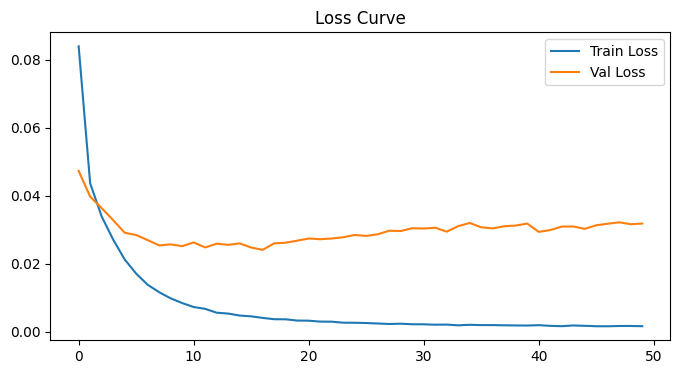

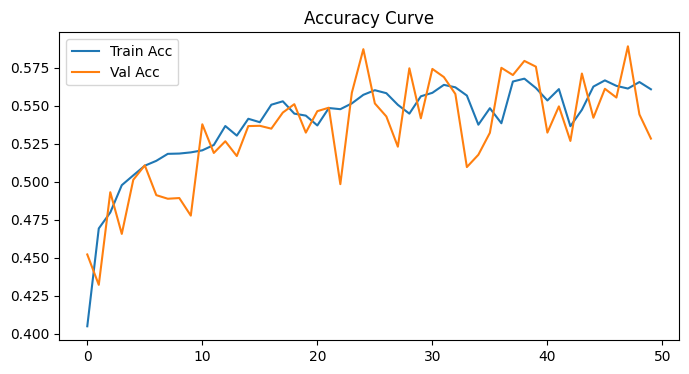

1033/1033 [==============================] - 5s 5ms/step - loss: 0.0318 - accuracy: 0.5284
Test Loss: 0.0318, Test Acc: 0.5284


In [14]:
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Layer
from tensorflow.keras.models import Model
import tensorflow as tf

# 1) Ïñ¥ÌÖêÏÖò Î†àÏù¥Ïñ¥ Ï†ïÏùò
class Attention(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        # ÌûàÎì† Ïú†Îãõ Ï∞®ÏõêÎßåÌÅºÏùò Í∞ÄÏ§ëÏπò Î≤°ÌÑ∞ W (shape = [hidden_size, 1])
        self.W = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='glorot_uniform',
                                 trainable=True)

    def call(self, x):
        # x: (batch, seq_len, hidden_size)
        e = tf.matmul(x, self.W)             # (batch, seq_len, 1): Í∞Å ÌÉÄÏûÑÏä§ÌÖù Ï§ëÏöîÎèÑ Ï†êÏàò
        Œ± = tf.nn.softmax(e, axis=1)         # (batch, seq_len, 1): ÌôïÎ•† Î∂ÑÌè¨Î°ú Î≥ÄÌôò
        # Í∞ÄÏ§ëÌï©: Í∞Å ÌÉÄÏûÑÏä§ÌÖù Î≤°ÌÑ∞ x * Œ±Î•º ÏãúÌÄÄÏä§ Ï∞®ÏõêÏóêÏÑú Ìï©ÏÇ∞
        context = tf.reduce_sum(x * Œ±, axis=1)  # (batch, hidden_size)
        return context

# 2) Î™®Îç∏ Íµ¨Ï°∞
inputs = Input(shape=(max_len,))                      # ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÏûÖÎ†•
x = Embedding(vocab_size, 128, input_length=max_len)(inputs)
# ÏñëÎ∞©Ìñ• LSTM: ÏïûÍ≥º Îí§ Î¨∏Îß• Î™®Îëê ÌïôÏäµ
x = Bidirectional(LSTM(64, return_sequences=True))(x)  # (batch, seq_len, 128)
x = Attention()(x)                                     # (batch, 128)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(len(label_columns), activation='sigmoid')(x)  # Î©ÄÌã∞ÎùºÎ≤® ÏãúÍ∑∏Î™®Ïù¥Îìú

model = Model(inputs, outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# 3) Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏
model.summary()

# 4) ÌïôÏäµ (fit)
history = model.fit(
    X_train_pad,           # Ìå®Îî©Îêú ÌïôÏäµ ÏãúÌÄÄÏä§
    Y_train,               # (N, 15) Î©ÄÌã∞ÎùºÎ≤® ÌÉÄÍπÉ
    validation_data=(X_test_pad, Y_test),
    epochs=50,             # ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï
    batch_size=32
)

# 5) ÌïôÏäµ Í≤∞Í≥º ÏãúÍ∞ÅÌôî (Ïòà: ÏÜêÏã§, Ï†ïÌôïÎèÑ)
import matplotlib.pyplot as plt

# ÏÜêÏã§ Í≥°ÏÑ†
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],    label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Ï†ïÌôïÎèÑ Í≥°ÏÑ†
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'],    label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# 6) ÌèâÍ∞Ä (optional)
loss, acc = model.evaluate(X_test_pad, Y_test, batch_size=32)
print(f"Test Loss: {loss:.4f}, Test Acc: {acc:.4f}")

# 7) Î™®Îç∏ Î∞è ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï†ÄÏû•
import pickle
model.save('lstm_attention_model2.h5')
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f)

In [31]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Layer, Dense, LSTM, Bidirectional
import numpy as np

# ================= Ïª§Ïä§ÌÖÄ Attention Î†àÏù¥Ïñ¥ Ï†ïÏùò =================
class CustomAttention(Layer):
    """Attention Î™®Îç∏ Ìò∏ÌôòÏÑ±ÏùÑ ÏúÑÌïú Ïª§Ïä§ÌÖÄ Î†àÏù¥Ïñ¥"""
    
    def __init__(self, units=None, **kwargs):
        super(CustomAttention, self).__init__(**kwargs)
        self.units = units
    
    def build(self, input_shape):
        # input_shape: (batch_size, time_steps, features)
        self.W = self.add_weight(
            name='attention_weight',
            shape=(input_shape[-1], 1),
            initializer='random_normal',
            trainable=True
        )
        super(CustomAttention, self).build(input_shape)
    
    def call(self, inputs):
        # inputs shape: (batch_size, time_steps, features)
        # attention Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
        attention_scores = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1))
        attention_weights = tf.nn.softmax(attention_scores, axis=1)
        
        # Í∞ÄÏ§ëÌï© Í≥ÑÏÇ∞
        context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
        
        return context_vector
    
    def get_config(self):
        config = super(CustomAttention, self).get_config()
        config.update({'units': self.units})
        return config

# ================= ÏïàÏ†ÑÌïú Î™®Îç∏ Î°úÎìú Ìï®Ïàò =================
def load_model_with_custom_objects(model_path):
    """Ïª§Ïä§ÌÖÄ Í∞ùÏ≤¥ÏôÄ Ìï®Íªò Î™®Îç∏ÏùÑ ÏïàÏ†ÑÌïòÍ≤å Î°úÎìú"""
    
    custom_objects = {
        'CustomAttention': CustomAttention,
        'Attention': CustomAttention,  # Í∏∞Î≥∏ AttentionÏùÑ Ïª§Ïä§ÌÖÄÏúºÎ°ú ÎåÄÏ≤¥
        'LSTM': LSTM,
        'Bidirectional': Bidirectional,
        'Dense': Dense
    }
    
    methods = [
        # Î∞©Î≤ï 1: Ïª§Ïä§ÌÖÄ Í∞ùÏ≤¥ÏôÄ Ìï®Íªò Î°úÎìú
        lambda: load_model(model_path, custom_objects=custom_objects),
        
        # Î∞©Î≤ï 2: compile=FalseÎ°ú Î°úÎìú ÌõÑ Ïû¨Ïª¥ÌååÏùº
        lambda: load_model(model_path, custom_objects=custom_objects, compile=False),
        
        # Î∞©Î≤ï 3: Í∏∞Î≥∏ Î∞©Î≤ï
        lambda: load_model(model_path, compile=False)
    ]
    
    for i, method in enumerate(methods, 1):
        try:
            print(f"üîÑ Î∞©Î≤ï {i}Î°ú Î™®Îç∏ Î°úÎìú ÏãúÎèÑ...")
            model = method()
            
            # Î™®Îç∏Ïù¥ Ïª¥ÌååÏùºÎêòÏßÄ ÏïäÏïòÎã§Î©¥ Ïû¨Ïª¥ÌååÏùº
            if not hasattr(model, 'compiled_loss') or model.compiled_loss is None:
                print("üîß Î™®Îç∏ Ïû¨Ïª¥ÌååÏùº Ï§ë...")
                model.compile(
                    optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                )
            
            print(f"‚úÖ Î∞©Î≤ï {i}Î°ú Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ!")
            return model
            
        except Exception as e:
            print(f"‚ùå Î∞©Î≤ï {i} Ïã§Ìå®: {str(e)[:100]}...")
            continue
    
    raise Exception("Î™®Îì† Î°úÎìú Î∞©Î≤ïÏù¥ Ïã§Ìå®ÌñàÏäµÎãàÎã§.")

# ================= Î©îÏù∏ Î∂ÑÏÑù ÌÅ¥ÎûòÏä§ =================
class AttentionSentimentAnalyzer:
    def __init__(self, model_path='lstm_model.h5', tokenizer_path='tokenizer.pickle'):
        """Attention Í∏∞Î∞ò Í∞êÏÑ± Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî"""
        
        print("üöÄ Attention Í∞êÏÑ± Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî Ï§ë...")
        
        # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
        try:
            with open(tokenizer_path, 'rb') as f:
                self.tokenizer = pickle.load(f)
            print("‚úÖ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú ÏÑ±Í≥µ")
        except Exception as e:
            raise Exception(f"ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú Ïã§Ìå®: {e}")
        
        # Î™®Îç∏ Î°úÎìú
        try:
            self.model = load_model_with_custom_objects(model_path)
            print("‚úÖ Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ")
            
            # Î™®Îç∏ Ï†ïÎ≥¥ Ï∂úÎ†•
            print(f"üìä Î™®Îç∏ Ï†ïÎ≥¥:")
            print(f"   - ÏûÖÎ†• shape: {self.model.input_shape}")
            print(f"   - Ï∂úÎ†• shape: {self.model.output_shape}")
            print(f"   - Ï¥ù ÌååÎùºÎØ∏ÌÑ∞: {self.model.count_params():,}")
            
        except Exception as e:
            raise Exception(f"Î™®Îç∏ Î°úÎìú Ïã§Ìå®: {e}")
        
        # ÏÑ§Ï†ïÍ∞í
        self.aspects = ['ÎØ∏Î∞±', 'Î≥¥Ïäµ', 'Ìä∏Îü¨Î∏î', 'Î≥¥Ìò∏', 'ÎÖ∏ÌôîÎ∞©ÏßÄ']
        self.polarities = ['Í∏çÏ†ï', 'Î∂ÄÏ†ï', 'Ï§ëÎ¶Ω']
        self.label_cols = [f"{a}_{p}" for a in self.aspects for p in self.polarities]
        self.max_len = 100
        
        print("‚úÖ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å!")
    
    def predict_sentiment(self, text, threshold=0.5):
        """ÌÖçÏä§Ìä∏ Í∞êÏÑ± Î∂ÑÏÑù ÏòàÏ∏°"""
        try:
            # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
            seq = self.tokenizer.texts_to_sequences([text])
            padded = pad_sequences(seq, maxlen=self.max_len, padding='post')
            
            # ÏòàÏ∏° ÏàòÌñâ
            probs = self.model.predict(padded, verbose=0)[0]
            
            # Í≤∞Í≥º Ï†ïÎ¶¨
            scores = {self.label_cols[i]: float(probs[i]) for i in range(len(self.label_cols))}
            predictions = [self.label_cols[i] for i in range(len(self.label_cols)) if probs[i] >= threshold]
            
            return scores, predictions
            
        except Exception as e:
            print(f"‚ùå ÏòàÏ∏° Ï§ë Ïò§Î•ò: {e}")
            return {}, []
    
    def analyze_with_attention_details(self, text, threshold=0.5):
        """Attention Í∞ÄÏ§ëÏπòÏôÄ Ìï®Íªò ÏÉÅÏÑ∏ Î∂ÑÏÑù"""
        
        print(f"\n{'üéØ Attention Í∏∞Î∞ò Í∞êÏÑ± Î∂ÑÏÑù':=^60}")
        print(f"ÏûÖÎ†• ÌÖçÏä§Ìä∏: {text}")
        print("=" * 60)
        
        # Í∏∞Î≥∏ ÏòàÏ∏°
        scores, predictions = self.predict_sentiment(text, threshold)
        
        if not scores:
            print("‚ùå ÏòàÏ∏° Ïã§Ìå®")
            return
        
        # Í≤∞Í≥º Ï∂úÎ†•
        print(f"\nüìä Ï†ÑÏ≤¥ ÌôïÎ•†Í∞í (ÏûÑÍ≥ÑÍ∞í: {threshold}):")
        print("-" * 40)
        
        # ÌôïÎ•† ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
        sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        
        for label, prob in sorted_scores:
            percentage = prob * 100
            bar = "‚ñà" * max(1, int(prob * 15))
            status = "‚úÖ" if prob >= threshold else "‚ùå"
            print(f"{status} {label:12s}: {prob:.3f} ({percentage:4.1f}%) {bar}")
        
        print(f"\nüéØ ÏòàÏ∏° Í≤∞Í≥º ({len(predictions)}Í∞ú):")
        if predictions:
            for pred in predictions:
                print(f"   ‚Ä¢ {pred}")
        else:
            print(f"   ÏóÜÏùå (Î™®Îì† ÌôïÎ•†Ïù¥ {threshold} ÎØ∏Îßå)")
        
        # Ï∏°Î©¥Î≥Ñ ÏöîÏïΩ
        print(f"\nüìà Ï∏°Î©¥Î≥Ñ ÏöîÏïΩ:")
        print("-" * 30)
        
        for aspect in self.aspects:
            aspect_scores = {}
            for polarity in self.polarities:
                key = f"{aspect}_{polarity}"
                aspect_scores[polarity] = scores[key]
            
            # ÏµúÍ≥† Ï†êÏàò Ï∞æÍ∏∞
            best_polarity = max(aspect_scores.keys(), key=lambda k: aspect_scores[k])
            best_score = aspect_scores[best_polarity]
            
            emoji = "üòä" if best_polarity == "Í∏çÏ†ï" else "üòû" if best_polarity == "Î∂ÄÏ†ï" else "üòê"
            print(f"{aspect:6s}: {best_polarity} {emoji} ({best_score:.3f})")
    
    def compare_thresholds(self, text):
        """Îã§ÏñëÌïú ÏûÑÍ≥ÑÍ∞íÏúºÎ°ú ÎπÑÍµê Î∂ÑÏÑù"""
        
        print(f"\n{'üî¨ ÏûÑÍ≥ÑÍ∞í ÎπÑÍµê Î∂ÑÏÑù':=^60}")
        print(f"ÌÖçÏä§Ìä∏: {text}")
        print("=" * 60)
        
        thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
        
        print(f"{'ÏûÑÍ≥ÑÍ∞í':>8s} {'ÏòàÏ∏°Ïàò':>8s} {'Ï£ºÏöî ÏòàÏ∏°':>20s}")
        print("-" * 40)
        
        for threshold in thresholds:
            scores, predictions = self.predict_sentiment(text, threshold)
            
            # ÏÉÅÏúÑ 3Í∞ú ÏòàÏ∏°Îßå ÌëúÏãú
            top_predictions = predictions[:3] if predictions else ['ÏóÜÏùå']
            pred_str = ', '.join([p.split('_')[0] for p in top_predictions])
            
            print(f"{threshold:>8.1f} {len(predictions):>8d} {pred_str:>20s}")
        
        print(f"\nüí° Í∂åÏû• ÏûÑÍ≥ÑÍ∞í: 0.3~0.4 (Ï†ÅÎãπÌïú ÏòàÏ∏° Ïàò)")

# ================= Í∞ÑÎã® ÏÇ¨Ïö© Ìï®Ïàò =================
def quick_analysis(text, threshold=0.4):
    """Îπ†Î•∏ Î∂ÑÏÑù Ìï®Ïàò"""
    try:
        analyzer = AttentionSentimentAnalyzer()
        analyzer.analyze_with_attention_details(text, threshold)
        analyzer.compare_thresholds(text)
    except Exception as e:
        print(f"‚ùå Î∂ÑÏÑù Ïã§Ìå®: {e}")
        print("\nüîß Ìï¥Í≤∞ Î∞©Î≤ï:")
        print("1. lstm_model.h5 ÌååÏùºÏù¥ ÌòÑÏû¨ ÎîîÎ†âÌÜ†Î¶¨Ïóê ÏûàÎäîÏßÄ ÌôïÏù∏")
        print("2. tokenizer.pickle ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏")
        print("3. TensorFlow Î≤ÑÏ†Ñ ÌôïÏù∏ (pip install tensorflow>=2.8)")

# ================= ÏÇ¨Ïö© ÏòàÏ†ú =================
if __name__ == "__main__":
    
    print("üöÄ Attention Î™®Îç∏ Í∞êÏÑ± Î∂ÑÏÑù ÏãúÏûë")
    print("=" * 50)
    
    # ÌÖåÏä§Ìä∏ ÏÉòÌîåÎì§
    samples = [
        "Î∞îÎ•¥Í≥† ÎÇòÎãà ÌîºÎ∂ÄÍ∞Ä Ìôï Î∞ùÏïÑÏßÄÍ≥†, Ï¥âÏ¥âÌï®Ïù¥ Ïò§Îûò ÏßÄÏÜçÎèºÏöî. ÏûêÏô∏ÏÑ† Ï∞®Îã® Ìö®Í≥ºÎèÑ Ï¢ãÎÑ§Ïöî!",
        "ÏÇ¨Ïö©Ìïú ÏßÄ ÏùºÏ£ºÏùº ÎêêÎäîÎç∞ Ïó¨ÎìúÎ¶ÑÏù¥ Îçî ÏÉùÍ∏¥ Í≤É Í∞ôÏïÑÏöî. Í±¥Ï°∞Ìï¥ÏÑú ÎãπÍ≤®Ïöî.",
        "Î¨¥ÎÇúÌïòÍ≤å Ïì∏ ÎßåÌï¥Ïöî. ÌäπÎ≥ÑÌûà Ï¢ãÏßÄÎèÑ ÎÇòÏÅòÏßÄÎèÑ ÏïäÏùÄ Í≤É Í∞ôÏïÑÏöî."
    ]
    
    # Í∞Å ÏÉòÌîå Î∂ÑÏÑù
    for i, sample in enumerate(samples, 1):
        print(f"\n{'üìù ÏÉòÌîå ' + str(i) + ' Î∂ÑÏÑù':=^70}")
        quick_analysis(sample, threshold=0.4)
    
    print(f"\n{'‚ú® Î∂ÑÏÑù ÏôÑÎ£å!':=^70}")
    print("üí° ÌåÅ: thresholdÎ•º 0.3ÏúºÎ°ú ÎÇÆÏ∂îÎ©¥ Îçî ÎßéÏùÄ ÏòàÏ∏°ÏùÑ Î≥º Ïàò ÏûàÏñ¥Ïöî!")


üöÄ Attention Î™®Îç∏ Í∞êÏÑ± Î∂ÑÏÑù ÏãúÏûë

==============================üìù ÏÉòÌîå 1 Î∂ÑÏÑù===============================
üöÄ Attention Í∞êÏÑ± Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî Ï§ë...
‚úÖ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú ÏÑ±Í≥µ
üîÑ Î∞©Î≤ï 1Î°ú Î™®Îç∏ Î°úÎìú ÏãúÎèÑ...
‚úÖ Î∞©Î≤ï 1Î°ú Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ!
‚úÖ Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ
üìä Î™®Îç∏ Ï†ïÎ≥¥:
   - ÏûÖÎ†• shape: (None, 100)
   - Ï∂úÎ†• shape: (None, 15)
   - Ï¥ù ÌååÎùºÎØ∏ÌÑ∞: 1,388,175
‚úÖ Ï¥àÍ∏∞Ìôî ÏôÑÎ£å!

====================üéØ Attention Í∏∞Î∞ò Í∞êÏÑ± Î∂ÑÏÑù====================
ÏûÖÎ†• ÌÖçÏä§Ìä∏: Î∞îÎ•¥Í≥† ÎÇòÎãà ÌîºÎ∂ÄÍ∞Ä Ìôï Î∞ùÏïÑÏßÄÍ≥†, Ï¥âÏ¥âÌï®Ïù¥ Ïò§Îûò ÏßÄÏÜçÎèºÏöî. ÏûêÏô∏ÏÑ† Ï∞®Îã® Ìö®Í≥ºÎèÑ Ï¢ãÎÑ§Ïöî!

üìä Ï†ÑÏ≤¥ ÌôïÎ•†Í∞í (ÏûÑÍ≥ÑÍ∞í: 0.4):
----------------------------------------
‚úÖ Î≥¥Ïäµ_Ï§ëÎ¶Ω       : 0.982 (98.2%) ‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà
‚ùå ÎØ∏Î∞±_Ï§ëÎ¶Ω       : 0.002 ( 0.2%) ‚ñà
‚ùå ÎÖ∏ÌôîÎ∞©ÏßÄ_Ï§ëÎ¶Ω     : 0.001 ( 0.1%) ‚ñà
‚ùå Î≥¥Ïäµ_Í∏çÏ†ï       : 0.001 ( 0.1%) ‚ñà
‚ùå Î≥¥Ìò∏_Ï§ëÎ¶Ω       : 0.000 ( 0.0%